<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_3_1_Vive_les_courses_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vive les courses 



0. Importez les librairies usuelles

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Télécharger le dataset customer.csv sur le drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Saving customers.csv to customers.csv


In [3]:
df = pd.read_csv('/content/drive/My Drive/customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Supprimez les variables qualitatives du dataset

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


4. Conservez maintenant uniquement les colonnes Grocery et Milk

In [4]:
df2 = df[["Grocery", "Milk"]]
df2.head()

,Grocery,Milk
0,7561,9656
1,9568,9810
2,7684,8808
3,4221,1196
4,7198,5410


5. Visualisez ces données via un scatter plot

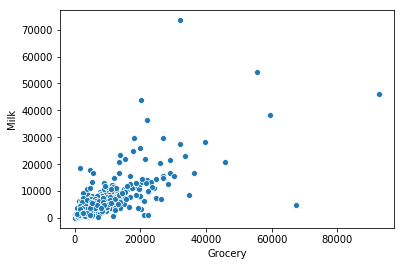

In [5]:
sns.scatterplot(x= "Grocery", y = "Milk", data = df2)

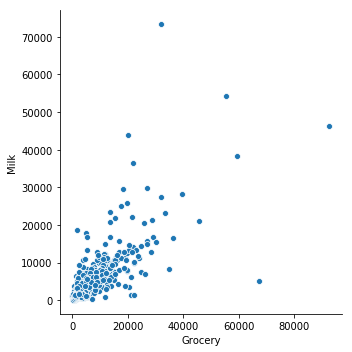

6. Normalisez les données

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df2 = sc_x.fit_transform(df2)
df2

array([[-4.11148934e-02,  5.23567773e-01],
       [ 1.70318354e-01,  5.44457667e-01],
       [-2.81571010e-02,  4.08537706e-01],
       [-3.92976899e-01, -6.24019925e-01],
       [-7.93561833e-02, -5.23964546e-02],
       [-2.97637045e-01,  3.34066589e-01],
       [-1.02848766e-01, -3.52315651e-01],
       [ 1.55358951e-01, -1.13980948e-01],
       [-1.85336177e-01, -2.91409401e-01],
       [ 1.15142340e+00,  7.18494904e-01],
       [ 5.29133322e-01, -5.33459952e-02],
       [-3.61161832e-01, -6.33786629e-01],
       [ 4.00924920e-01,  8.84800166e-01],
       [ 7.40671917e-01,  5.58511794e-02],
       [ 4.36111121e-01,  4.97658878e-01],
       [-4.35116062e-01, -6.35143116e-01],
       [ 4.39271558e-01,  4.09622895e-01],
       [-5.28665002e-01,  4.89330975e-02],
       [ 2.26258092e-01,  7.19933704e-02],
       [ 1.59362172e-01, -4.47812310e-01],
       [-3.52839347e-01, -1.73259414e-01],
       [-6.25901120e-01, -6.68105741e-01],
       [-3.66850619e-01, -5.26217238e-01],
       [ 1.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


7. Définissez une instance de DBSCAN avec les paramètres eps = .5, 
min_samples = 15

In [7]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=15).fit(df2)
clustering.labels_

clustering 

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

8. Créez un objet dbscan_predict qui contient les classes définies par DBSCAN

In [0]:
dbscan_predict = clustering.fit_predict(df2)
dbscan_predict

9. Visualisez les données en colorant les points en fonction de la classe trouvée par DBSCAN

In [13]:
print(len(clustering.labels_))
print(len(dbscan_predict))
print(len(df2))

440
440
440


In [19]:
dbscan_predict

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [0]:
df2 = pd.DataFrame(df2)
df2["dbs"] = dbscan_predict
df2

In [0]:
df2.columns = ["Milk", "Grocery", "dbs"]

In [25]:
df2.head()

,Milk,Grocery,dbs
0,-0.041115,0.523568,0
1,0.170318,0.544458,0
2,-0.028157,0.408538,0
3,-0.392977,-0.624020,0
4,-0.079356,-0.052396,0


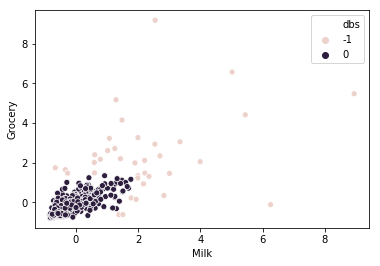

In [27]:
sns.scatterplot(x= "Milk", y = "Grocery", data = df2, hue = "dbs")

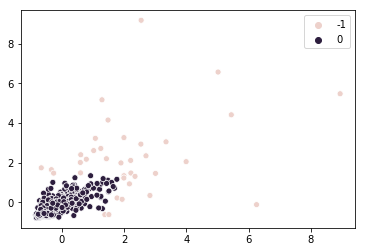

In [28]:
#isoler cluster 0
df2[dbscan_predict==0]

,Milk,Grocery,dbs
0,-0.041115,0.523568,0
1,0.170318,0.544458,0
2,-0.028157,0.408538,0
3,-0.392977,-0.624020,0
4,-0.079356,-0.052396,0
5,-0.297637,0.334067,0
6,-0.102849,-0.352316,0
7,0.155359,-0.113981,0
8,-0.185336,-0.291409,0
9,1.151423,0.718495,0
